# KPIs & Metrics

To ensure a fair and accurate comparison between the Control and Test variations when calculating KPIs, we decided to use the same sample size for both groups, 100 000 values.

Basically, picking a random sample for both groups we eliminate bias, our test or analysis is more valid because they have equal size and gives better impression in compabarability since the differences observered are due to variation and not on the sample size.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/Project/Datasets/df_cleaned.csv'
df_cleaned = pd.read_csv(file_path)

# Convert date_time to datetime
df_cleaned['date_time'] = pd.to_datetime(df_cleaned['date_time'])

# Display the first few rows of the dataframe to understand its structure
df_cleaned.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,balance,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time,log_balance
0,836976,6,73,60,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,10.716777
1,836976,6,73,60,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,10.716777
2,836976,6,73,60,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,10.716777
3,836976,6,73,60,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,10.716777
4,836976,6,73,60,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,10.716777


In [3]:
# Define sample size
sample_size = 100000

# Sample the Control group
df_control = df_cleaned[df_cleaned['variation'] == 'Control'].sample(n=sample_size, random_state=42)

# Sample the Test group
df_test = df_cleaned[df_cleaned['variation'] == 'Test'].sample(n=sample_size, random_state=42)

In [4]:
#export the dataframes to csv
df_test.to_csv('C:\\Users\\USER\\Downloads\\df_test_random.csv', index=False)
df_control.to_csv('C:\\Users\\USER\\Downloads\\df_control_random.csv', index=False)

### Completion Rate
*Proportion of users reaching the ‘confirm’ step in the old and new design*

In [5]:
# Calculate the completion rate for both Test and Control groups
completion_rate_control = df_control[df_control['process_step'] == 'confirm'].shape[0] / df_control['visit_id'].nunique()
completion_rate_test = df_test[df_test['process_step'] == 'confirm'].shape[0] / df_test['visit_id'].nunique()

#Print the completion rate in percentage round by 1 decimal and separated by variation
print('Completion rate by variation:')
print('Control:',round(completion_rate_control * 100, 1),'%')
print('Test:', round(completion_rate_test * 100, 1),'%')

Completion rate by variation:
Control: 45.6 %
Test: 48.0 %


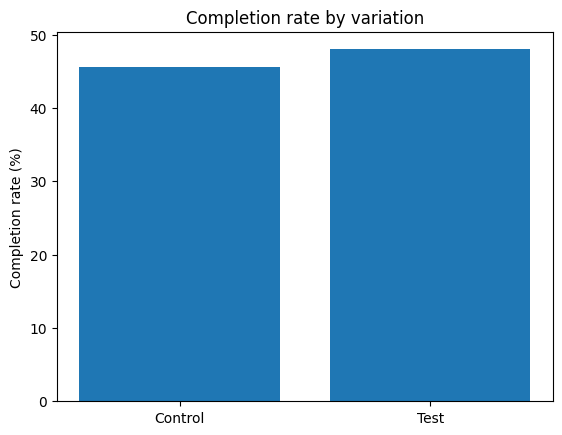

In [29]:
#Graphical representation of the completion rate by variation, completion rate scale values in %
plt.bar(['Control', 'Test'], [completion_rate_control * 100, completion_rate_test * 100])
plt.ylabel('Completion rate (%)')
plt.title('Completion rate by variation')
plt.show()

Completion rate by variation:
- Control: 45.6 %
- Test: 48.0 %

**Conclusion**: The completion rate for the Test group is higher than that of the Control group, indicating a positive impact of the new design on user success rates. The 2.4 percentage point increase suggests that the new design is more effective in guiding users to complete the process.

### Time Spent on Each Step
*Average duration on each step by design*

- Control (Old Version)

In [30]:
# Calculate Average Time Spent on Each Step for Control group
df_control['next_date_time'] = df_control.groupby('visit_id')['date_time'].shift(-1)
df_control['step_duration'] = df_control['next_date_time'] - df_control['date_time']

# Remove any negative durations
df_control = df_control[df_control['step_duration'] >= pd.Timedelta(0)]

average_time_spent_control = df_control.groupby('process_step')['step_duration'].mean().reset_index()

# Convert step_duration to total seconds for calculation and round
average_time_spent_control['step_duration_seconds'] = average_time_spent_control['step_duration'].dt.total_seconds().round(0)

# Convert step_duration_seconds to minutes and seconds
average_time_spent_control['step_duration_minutes'] = average_time_spent_control['step_duration_seconds'] // 60
average_time_spent_control['step_duration_seconds_only'] = average_time_spent_control['step_duration_seconds'] % 60
average_time_spent_control['formatted_duration'] = average_time_spent_control.apply(lambda row: f"{int(row['step_duration_minutes'])} minutes {int(row['step_duration_seconds_only'])} seconds", axis=1)

# Display the results
print("Control Group Average Time Spent on Each Step:")
print(average_time_spent_control[['process_step', 'formatted_duration', 'step_duration_seconds']])

Control Group Average Time Spent on Each Step:
  process_step    formatted_duration  step_duration_seconds
0      confirm  4 minutes 44 seconds                  284.0
1        start  3 minutes 42 seconds                  222.0
2       step_1  3 minutes 34 seconds                  214.0
3       step_2  3 minutes 48 seconds                  228.0
4       step_3  3 minutes 36 seconds                  216.0


- Test (New Version)

In [31]:
# Calculate Average Time Spent on Each Step for Test group
df_test['next_date_time'] = df_test.groupby('visit_id')['date_time'].shift(-1)
df_test['step_duration'] = df_test['next_date_time'] - df_test['date_time']

# Remove any negative durations
df_test = df_test[df_test['step_duration'] >= pd.Timedelta(0)]

average_time_spent_test = df_test.groupby('process_step')['step_duration'].mean().reset_index()

# Convert step_duration to total seconds for calculation and round
average_time_spent_test['step_duration_seconds'] = average_time_spent_test['step_duration'].dt.total_seconds().round(0)

# Convert step_duration_seconds to minutes and seconds
average_time_spent_test['step_duration_minutes'] = average_time_spent_test['step_duration_seconds'] // 60
average_time_spent_test['step_duration_seconds_only'] = average_time_spent_test['step_duration_seconds'] % 60
average_time_spent_test['formatted_duration'] = average_time_spent_test.apply(lambda row: f"{int(row['step_duration_minutes'])} minutes {int(row['step_duration_seconds_only'])} seconds", axis=1)

# Display the results
print("Test Group Average Time Spent on Each Step:")
print(average_time_spent_test[['process_step', 'formatted_duration', 'step_duration_seconds']])

Test Group Average Time Spent on Each Step:
  process_step    formatted_duration  step_duration_seconds
0      confirm   8 minutes 9 seconds                  489.0
1        start   4 minutes 4 seconds                  244.0
2       step_1  3 minutes 59 seconds                  239.0
3       step_2   4 minutes 9 seconds                  249.0
4       step_3  3 minutes 58 seconds                  238.0


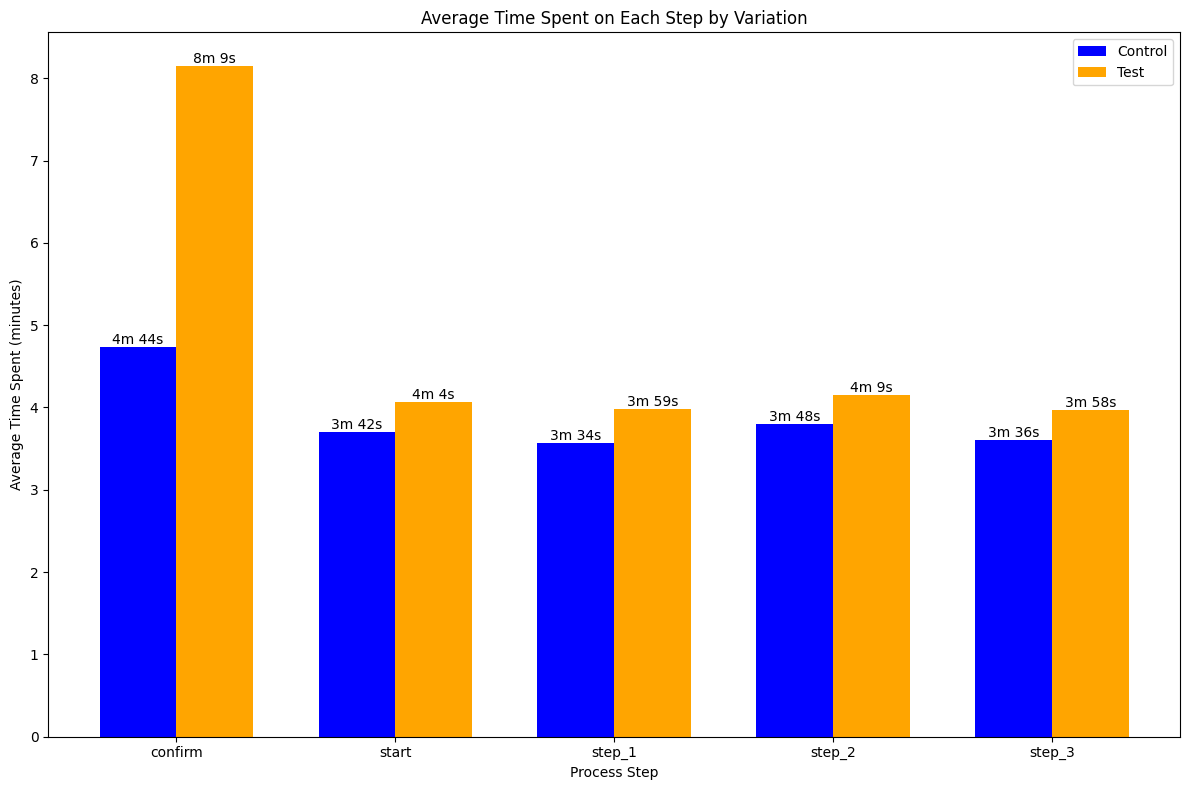

In [32]:
import numpy as np

# Plotting the comparison
fig, ax = plt.subplots(figsize=(12, 8))

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(average_time_spent_control['process_step']))

# Plot bars for Control group
bars1 = ax.bar(index, average_time_spent_control['step_duration_minutes'] + average_time_spent_control['step_duration_seconds_only'] / 60, bar_width, label='Control', color='blue')

# Plot bars for Test group
bars2 = ax.bar(index + bar_width, average_time_spent_test['step_duration_minutes'] + average_time_spent_test['step_duration_seconds_only'] / 60, bar_width, label='Test', color='orange')

# Adding labels and title
ax.set_xlabel('Process Step')
ax.set_ylabel('Average Time Spent (minutes)')
ax.set_title('Average Time Spent on Each Step by Variation')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(average_time_spent_control['process_step'])
ax.legend()

# Adding the duration in minutes and seconds as text on the bars
def add_labels(bars, durations_seconds):
    for bar, duration_seconds in zip(bars, durations_seconds):
        minutes = int(duration_seconds // 60)
        seconds = int(duration_seconds % 60)
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                f'{minutes}m {seconds}s',
                ha='center', va='bottom', fontsize=10, color='black')

add_labels(bars1, average_time_spent_control['step_duration_seconds'])
add_labels(bars2, average_time_spent_test['step_duration_seconds'])

# Display the plot
plt.tight_layout()
plt.show()

**Control Group**:

- Confirm: 4 minutes 44 seconds (284 seconds)
- Start: 3 minutes 42 seconds (222 seconds)
- Step 1: 3 minutes 34 seconds (214 seconds)
- Step 2: 3 minutes 48 seconds (228 seconds)
- Step 3: 3 minutes 36 seconds (216 seconds)

**Test Group**:

- Confirm: 8 minutes 9 seconds (489 seconds)
- Start: 4 minutes 4 seconds (244 seconds)
- Step 1: 3 minutes 59 seconds (239 seconds)
- Step 2: 4 minutes 9 seconds (249 seconds)
- Step 3: 3 minutes 58 seconds (238 seconds)

**Conclusion**: The time spent on each step is generally higher in the Test group compared to the Control group, especially for the "Confirm" step, which takes significantly longer. While the Test group shows a higher completion rate, the increased time spent may indicate additional complexities or steps in the new design that need to be addressed to optimize user efficiency.

### Error Rates
*Steps where users revert to previous steps*

- Control (Old Version)

In [33]:
# Sort the dataframe by visitor_id and date_time to ensure chronological order
df_control = df_control.sort_values(by=['visitor_id', 'date_time'])

# Calculate the time difference between steps
df_control['next_date_time'] = df_control.groupby('visit_id')['date_time'].shift(-1)
df_control['step_duration'] = df_control['next_date_time'] - df_control['date_time']

# Filter out the rows where next_date_time is NaT (last steps)
df_control_filtered = df_control.dropna(subset=['next_date_time'])

# Identify steps where users revert to previous steps
df_control_filtered['next_step'] = df_control_filtered.groupby('visit_id')['process_step'].shift(-1)
df_control_filtered['revert'] = df_control_filtered['process_step'] > df_control_filtered['next_step']

# Calculate error rates for the Control group
error_rates_control = df_control_filtered.groupby('process_step')['revert'].mean().reset_index()
error_rates_control.rename(columns={'revert': 'error_rate'}, inplace=True)

# Convert error rates to percentage and round to 2 decimals
error_rates_control['error_rate'] = (error_rates_control['error_rate'] * 100).round(2)

# Display the results
print("Error Rates on Each Step for Control Group")
print(error_rates_control)

Error Rates on Each Step for Control Group
  process_step  error_rate
0      confirm        0.00
1        start        0.06
2       step_1        4.54
3       step_2       11.76
4       step_3       34.84


C:\Users\USER\AppData\Local\Temp\ipykernel_28512\2628475031.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control_filtered['next_step'] = df_control_filtered.groupby('visit_id')['process_step'].shift(-1)
C:\Users\USER\AppData\Local\Temp\ipykernel_28512\2628475031.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control_filtered['revert'] = df_control_filtered['process_step'] > df_control_filtered['next_step']


- Test (New Version)

In [34]:
# Sort the dataframe by visitor_id and date_time to ensure chronological order
df_test = df_test.sort_values(by=['visitor_id', 'date_time'])

# Calculate the time difference between steps
df_test['next_date_time'] = df_test.groupby('visit_id')['date_time'].shift(-1)
df_test['step_duration'] = df_test['next_date_time'] - df_test['date_time']

# Filter out the rows where next_date_time is NaT (last steps)
df_test_filtered = df_test.dropna(subset=['next_date_time'])

# Identify steps where users revert to previous steps
df_test_filtered['next_step'] = df_test_filtered.groupby('visit_id')['process_step'].shift(-1)
df_test_filtered['revert'] = df_test_filtered['process_step'] > df_test_filtered['next_step']

# Calculate error rates for the Test group
error_rates_test = df_test_filtered.groupby('process_step')['revert'].mean().reset_index()
error_rates_test.rename(columns={'revert': 'error_rate'}, inplace=True)

# Convert error rates to percentage and round to 2 decimals
error_rates_test['error_rate'] = (error_rates_test['error_rate'] * 100).round(2)

# Display the results
print("Error Rates on Each Step for Test Group")
print(error_rates_test)

Error Rates on Each Step for Test Group
  process_step  error_rate
0      confirm        0.00
1        start        0.04
2       step_1        8.42
3       step_2       14.51
4       step_3       36.24


C:\Users\USER\AppData\Local\Temp\ipykernel_28512\3285428583.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_filtered['next_step'] = df_test_filtered.groupby('visit_id')['process_step'].shift(-1)
C:\Users\USER\AppData\Local\Temp\ipykernel_28512\3285428583.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_filtered['revert'] = df_test_filtered['process_step'] > df_test_filtered['next_step']


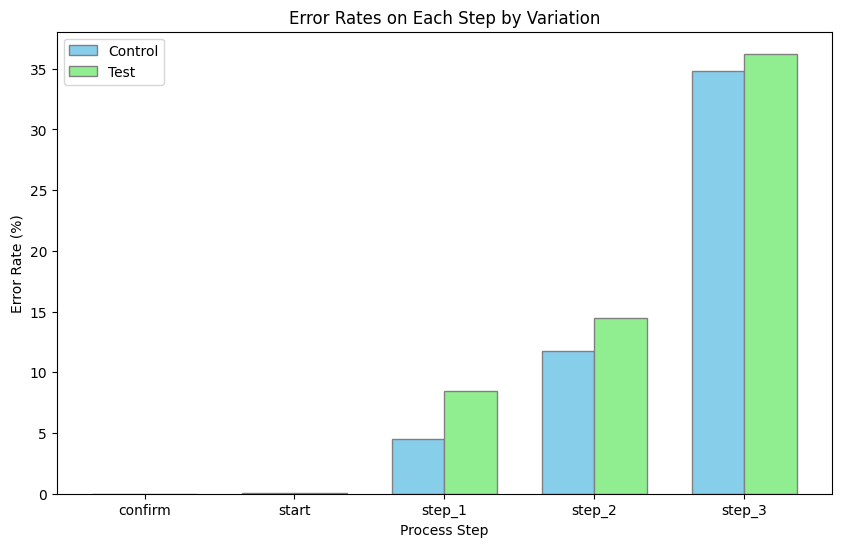

In [35]:
#Plot a compraision of the error rates on each step by variation 
plt.figure(figsize=(10, 6))
barWidth = 0.35
r1 = np.arange(len(error_rates_control))
r2 = [x + barWidth for x in r1]
plt.bar(r1, error_rates_control['error_rate'], color='skyblue', width=barWidth, edgecolor='grey', label='Control')
plt.bar(r2, error_rates_test['error_rate'], color='lightgreen', width=barWidth, edgecolor='grey', label='Test')
plt.xlabel('Process Step')
plt.ylabel('Error Rate (%)')
plt.title('Error Rates on Each Step by Variation')
plt.xticks([r + barWidth/2 for r in range(len(error_rates_control))], error_rates_control['process_step'])
plt.legend()
plt.show()

**Control Group**:

- Confirm: 0.00%
- Start: 0.06%
- Step 1: 4.54%
- Step 2: 11.76%
- Step 3: 34.84%

**Test Group**:

- Confirm: 0.00%
- Start: 0.04%
- Step 1: 8.42%
- Step 2: 14.51%
- Step 3: 36.24%

**Conclusion**: The error rates are higher in the Test group for "Step 1," "Step 2," and "Step 3" compared to the Control group. This suggests that users may find certain steps in the new design more challenging, which leads to a higher likelihood of errors.

#### Overall Conclusion

In conclusion, the new design shows promise with a higher completion rate, but it also introduces challenges in terms of time efficiency and error rates. By addressing these issues through focused improvements and support, the new design can be optimized for better overall performance and user satisfaction.